<div align="center"> 

# Investigating Oil prices and Big Tech. Companies Stock Market 

<p>Between 2001-1-1 - 2023-12-31</p>
</div>

In this project, the skills acquired from advanced data wrangling course are applied to gather and wrangle real-world data with two datasets. They are retrieved and extractd, then assessed programmatically and visually, accross elements of data quality and structure, and a cleaning strategy for the data was implemented. Then the updated data is stored into the directiry ./data as a data store, combined the data, and tried to answer a research question with these datasets.

## **1.** Problem Statement

In this reserach, the stock prices of major tech companies (such as Apple, Microsoft, Google, Amazon, and META) and oil prices over the period spanning from January 2001 to December 2005 are investigated. By examining historical data for both sectors, the aim is to uncover insights into how changes in oil prices impact the financial performance of big tech companies, and vice versa.
The datasets would include the stock market data for:
- META
- AMazon
- Google
- Apple
- Microsoft

## **2.** Solution Pipeline
1. Gather Data
2. Asses Data
3. Clean Data
4. Store Data
5. Answering Research Questions

### Neccessary Imports

In [1]:
import requests
import pandas as pd
import yfinance as yf
import requests
import config
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 3. Gather data

In this section, data using two different (data gathering methods) are extractand and then combined. Two different types of data-gathering methods are use:
- Programmatically downloading files
- Gathering data by accessing APIs

### **3.1.** Gathering Data Methods and Code

In this project, two types of data gathering are use: 
- Programmatically downloading files
- Gathering data by accessing APIs

Each of the datasets have at least two variables, and have greater than 500 data samples within.

#### **Dataset 1**: Oils and Petroleum dataset 

##### *About this dataset*

**Type:** JSON response

**Method:** The data was gathered using the "by accessing APIs" method from https://api.eia.gov/v2/petroleum/pri/spt/data/

**Dataset variables:**

| Column Name | Description |
|---|---|
| period |  date associated with the data point |
| duoarea | identifier for a specific geographical area |
| area-name | area name |
| product | identifier for the specific petroleum product |
| product-name | name of the product |
| process | identifier for the specific process |
| process-name | The name of the process used |
| series | identifier for the specific data series |
| series-description | descriptive text name or label for the data |
|value| The price|
|units| unit of the price |

##### *Gathering by API*

In [2]:
## Gather the data using the "Gather data by accessing APIs" method from https://api.eia.gov
api_key = config.EIA_API_KEY
url = f'https://api.eia.gov/v2/petroleum/pri/gnd/data/?'

params = {
    'api_key':api_key,
    "frequency": "weekly",
    "data[0]": "value",
    "facets": {},
    "start": "2005-01-01",
    "end": "2023-12-31",
    "offset": 0,
    "length": 5000
}

response = requests.get(url, params=params)
data = response.json()
oil_data =pd.DataFrame(data['response']['data'])
oil_data.sample(5)

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
4994,2023-04-10,R1X,PADD 1A,EPM0R,Reformulated Motor Gasoline,PTE,Retail Sales,EMM_EPM0R_PTE_R1X_DPG,New England (PADD 1A) All Grades Reformulated ...,3.46,$/GAL
1023,2016-06-06,R50,PADD 5,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PTE,Retail Sales,EMD_EPD2DXL0_PTE_R50_DPG,West Coast No 2 Diesel Ultra Low Sulfur (0-15 ...,2.681,$/GAL
4782,2012-08-13,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,3.779,$/GAL
3934,2017-10-02,SMN,MINNESOTA,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_SMN_DPG,Minnesota All Grades All Formulations Retail G...,2.449,$/GAL
982,2007-12-03,R50,PADD 5,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PTE,Retail Sales,EMD_EPD2DXL0_PTE_R50_DPG,West Coast No 2 Diesel Ultra Low Sulfur (0-15 ...,3.543,$/GAL


In [3]:
oil_data.shape

(5000, 11)

> The gathered dataset have 5000 rows and 11 features.

In [4]:
oil_data.to_csv('data/oil_data_api.csv', index=False) ## store to cvs file

> Storing step: the dataset is saved to the local data store directory before moving to the next step.

#### **Dataset 2**: Stocks Dataset

##### *About this dataset*
**Type:** Pandas.DataFrame

**Method:** The data was gathered using the "Programmatically downloading files" method from Yahoo Finance using the yfinance library

**Dataset variables:**

| Column Name | Description |
|---|---|
| Date | date associated with the data point |
| Open | The opening price of the stock on that date. |
| High | The highest price reached by the stock on that date. |
| Low | The lowest price reached by the stock on that date. |
| Close | The closing price of the stock on that date. |
| Adj Close | The adjusted closing price, adjusted for dividends and splits. |
| Volume | The number of shares traded on that date. |

##### *Gathering by Programmatically Downloading*

In [5]:
## 2nd data gathering was downloaded programitticallly from Yahoo Finance using the yfinance library
companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
stocks_data = yf.download(companies, start='2005-01-01', end='2023-12-31')
stocks_data.reset_index(inplace=True)
stocks_data.sample(5)

[*********************100%%**********************]  5 of 5 completed


Price        Date  Adj Close                                              \
Ticker                  AAPL     AMZN      GOOGL        META        MSFT   
2081   2013-04-11  13.308058  13.4925  19.756855   27.962540   23.762344   
3547   2019-02-06  41.699524  82.0130  56.080139  170.140366  100.319008   
2962   2016-10-07  26.332531  41.9715  39.989605  128.725479   52.229252   
1330   2010-04-16   7.470178   7.1085  13.751736         NaN   23.286186   
2000   2012-12-12  16.419495  12.5880  17.436443   27.523441   22.182825   

Price       Close                                  ...       Open             \
Ticker       AAPL     AMZN      GOOGL        META  ...       AAPL       AMZN   
2081    15.511786  13.4925  19.779530   28.020000  ...  15.490000  13.237000   
3547    43.560001  82.0130  56.144501  170.490005  ...  43.662498  83.537498   
2962    28.514999  41.9715  40.035500  128.990005  ...  28.577499  42.289501   
1330     8.835714   7.1085  13.767518         NaN  ...   8.877500   7.244000   
2000    19.250000  12.5880  17.456455   27.580000  ...  19.563213  12.553500   

Price                                         Volume                        \
Ticker      GOOGL        META        MSFT       AAPL       AMZN      GOOGL   
2081    19.841843   27.480000   29.100000  328364400   61810000   81066852   
3547    57.463501  171.199997  107.000000  112958400   78798000   48256000   
2962    40.296501  129.039993   57.849998   97433600   48524000   23262000   
1330    14.089089         NaN   30.790001  750545600  167936000  488930580   
2000    17.498247   28.000000   27.530001  487144000   52562000   96942960   

Price                          
Ticker        META       MSFT  
2081    33368500.0  130923200  
3547    13281200.0   20609800  
2962    12804400.0   20089000  
1330           NaN   88703100  
2000    46704200.0   43966300  

[5 rows x 31 columns]

In [6]:
stocks_data.shape

(4781, 31)

> The gathered data has 4781 data points and 31 features.

In [7]:
stocks_data.to_csv('data/stock_data.csv', index=False) ## store to cvs file

> Storing step: the dataset is saved to the local data store directory before moving to the next step.

## 4. Assess data
Now that we have gathered the datasets, let's assess the dataset for data quality and structural issues. In this section, the data is assessed according to data quality and tidiness metrics. Where two data quality issues and two tidiness issues are assessed. Each are assess visually and programmatically, then the issue is described. Justifications for the methods used for the assessment are also included.
Issues assessed:
- Completness
- Validity
- Columns Names
- Inexing of the data

### **Completeness (Quality Issue #1):**
This is the issue of having missing data in the datsets. It affects good analysis and will be assessed for both datasets programmatically and visualy.

#### **Stocks Dataset**

##### *Inspecting the dataframe visually*
To inspcet the data qaulity issue of completeness, let's visualize the ddata frame into a heatmap. It will be showing the missing data with a diffrent color.

In [8]:
nan = ['NA','NaN','-', '0',0, np.nan] ## possible null vlaues

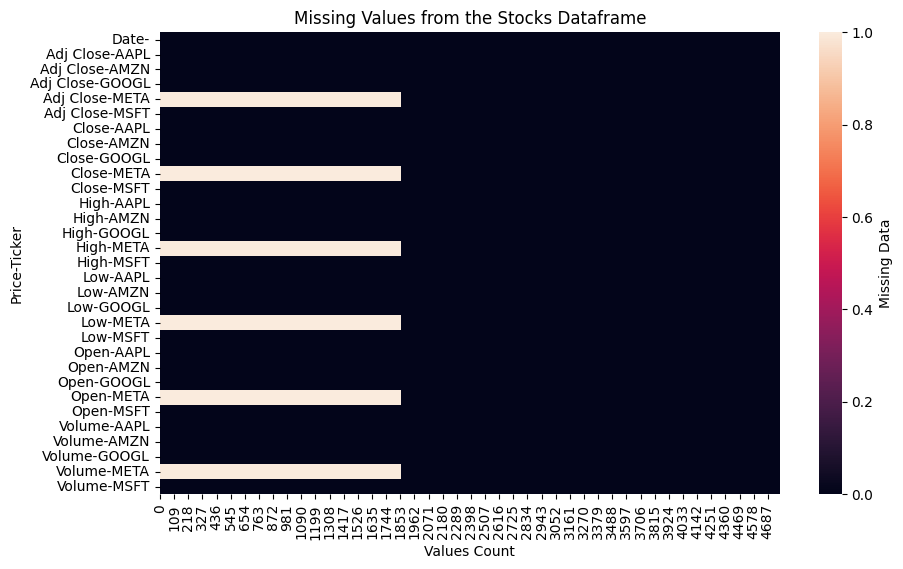

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(stocks_data.isin(nan).transpose(), cbar_kws={'label': 'Missing Data'}) ## visualize the missing data transposed
plt.title('Missing Values from the Stocks Dataframe')
plt.xlabel('Values Count');

> There are noticed missing data from the META stocks, probably is joined teh stocks after 2007.

##### Inspecting the dataframe programmatically
To inspect for missing values programmatically the `.info()` is used alongside checking the `.isna()` methos.

In [10]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            4781 non-null   datetime64[ns]
 1   (Adj Close, AAPL)   4781 non-null   float64       
 2   (Adj Close, AMZN)   4781 non-null   float64       
 3   (Adj Close, GOOGL)  4781 non-null   float64       
 4   (Adj Close, META)   2923 non-null   float64       
 5   (Adj Close, MSFT)   4781 non-null   float64       
 6   (Close, AAPL)       4781 non-null   float64       
 7   (Close, AMZN)       4781 non-null   float64       
 8   (Close, GOOGL)      4781 non-null   float64       
 9   (Close, META)       2923 non-null   float64       
 10  (Close, MSFT)       4781 non-null   float64       
 11  (High, AAPL)        4781 non-null   float64       
 12  (High, AMZN)        4781 non-null   float64       
 13  (High, GOOGL)       4781 non-null   float64     

> While the range index is from 0 to 4781, some the columns arn't complete such as (Adj Close, META), (Close, META),  (High, META), (Low, META),  (Open, META), and (Volume, META).
> These missing data are specifically in data regarding the Google, and the META big tech companies.

In [11]:
stocks_data.isna().sum().sort_values(ascending=False) 

Price      Ticker
Open       META      1858
Volume     META      1858
Low        META      1858
Adj Close  META      1858
High       META      1858
Close      META      1858
Open       GOOGL        0
Low        MSFT         0
Open       AAPL         0
           AMZN         0
Date                    0
Low        AMZN         0
Open       MSFT         0
Volume     AAPL         0
           AMZN         0
           GOOGL        0
Low        GOOGL        0
High       MSFT         0
Low        AAPL         0
Adj Close  AAPL         0
High       GOOGL        0
           AMZN         0
           AAPL         0
Close      MSFT         0
           GOOGL        0
           AMZN         0
           AAPL         0
Adj Close  MSFT         0
           GOOGL        0
           AMZN         0
Volume     MSFT         0
dtype: int64

> There are 1858 missing records from the META Datasets.

#### **Oil Dataset**

##### *Inspecting the dataframe visually*
To inspcet the data qaulity issue of completeness, let's visualize the ddata frame into a heatmap. It will be showing the missing data with a diffrent color.

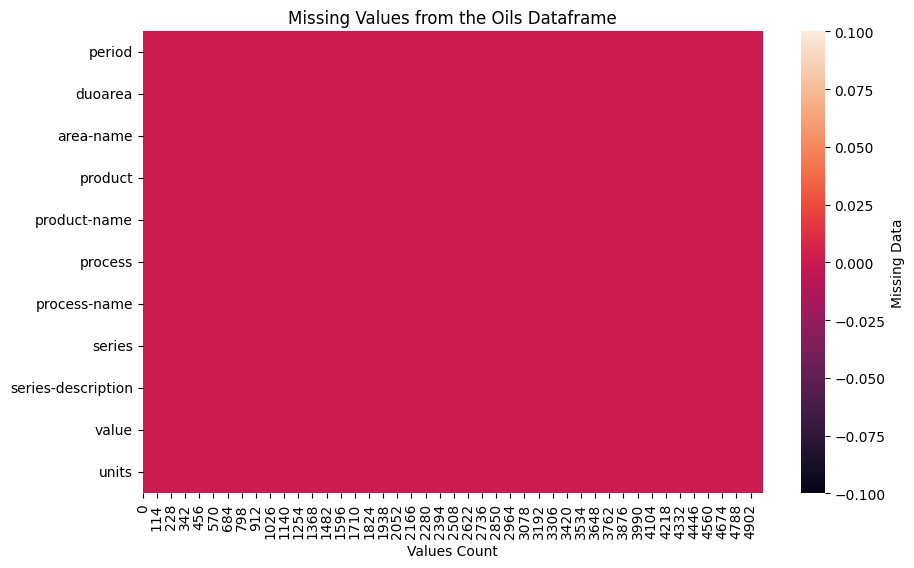

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(oil_data.isin(nan).transpose(), cbar_kws={'label': 'Missing Data'}) ## visualize the missing data transposed
plt.title('Missing Values from the Oils Dataframe')
plt.xlabel('Values Count');

> There are no missing values from the Oils Dataframe it has no completness issue.

##### *Inspecting the dataframe programmatically*
To inspect for missing values programmatically the `.info()` is used alongside checking the `.isna()` methos. However, some missing values wesn't detected using these methods so there had to use the `.isin()` method to check if there are missing values programmatically.

In [13]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              5000 non-null   object
 1   duoarea             5000 non-null   object
 2   area-name           5000 non-null   object
 3   product             5000 non-null   object
 4   product-name        5000 non-null   object
 5   process             5000 non-null   object
 6   process-name        5000 non-null   object
 7   series              5000 non-null   object
 8   series-description  5000 non-null   object
 9   value               5000 non-null   object
 10  units               5000 non-null   object
dtypes: object(11)
memory usage: 429.8+ KB


> The data have 0 to 4999 indices, and all the columns non-null counts are full except the value column it has three NAN values.

In [14]:
oil_data.sample(5) ## take a sample of 5

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
3933,2017-09-25,SMN,MINNESOTA,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_SMN_DPG,Minnesota All Grades All Formulations Retail G...,2.479,$/GAL
2244,2010-10-18,SNY,NEW YORK,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_SNY_DPG,New York All Grades All Formulations Retail Ga...,3.049,$/GAL
3161,2020-03-02,R20,PADD 2,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R20_DPG,Midwest All Grades All Formulations Retail Gas...,2.36,$/GAL
2654,2016-06-06,R5XCA,PADD 5 EXCEPT CALIFORNIA,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R5XCA_DPG,West Coast (PADD 5) Except California All Grad...,2.52,$/GAL
3112,2012-08-13,R20,PADD 2,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R20_DPG,Midwest All Grades All Formulations Retail Gas...,3.826,$/GAL


> However with further looking, it was noticed that there are NA values used to presnet the null values.

In [15]:
oil_data.isin(nan).sum() ## to check if some values are not detected using isna

period                0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
value                 0
units                 0
dtype: int64

> In the oil dataset there are no NAN values from the area-name column. The other columns doesn't have NA values. 

### **Validity (Quality Issue #2):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the validity of the dataframe programmatically, let's take a look into the datatypes of the dataset using the `.datatype` attribute of the datasets.

In [16]:
stocks_data.dtypes ## looking into datatypes

Price      Ticker
Date                 datetime64[ns]
Adj Close  AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Close      AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
High       AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Low        AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Open       AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Volume     AAPL               int64
          

> The datastypes are all valid. Let's take a look into why For the volume some of the columns have integer values.

In [17]:
stocks_data['Date'].sample(5) ## Take a sample of 5

2738   2015-11-17
218    2005-11-11
1495   2010-12-09
4580   2023-03-15
3145   2017-06-30
Name: Date, dtype: datetime64[ns]

> The datetime64 is actuualy only the date of the record there is no timestamps.

In [18]:
int_col= list(stocks_data.dtypes[stocks_data.dtypes == 'int64']['Volume'].index) ## take the values where the datatypes are integers
for col in int_col:
    print(stocks_data['Volume',col].sample(5))

4457    162278800
4050     84183100
2719    167180800
4769     70404200
1856    560896000
Name: (Volume, AAPL), dtype: int64
3227    112374000
2493     39672000
736     132172000
4727     45786600
474     130604000
Name: (Volume, AMZN), dtype: int64
4096     25682000
1592    168970860
2804     37092000
3572     27302000
2857     32634000
Name: (Volume, GOOGL), dtype: int64
2051    36394700
95      52120800
736     84894700
4498    31123300
1045    93428000
Name: (Volume, MSFT), dtype: int64


> The dataset is valid in terms of data types for the integers columns.

##### *Inspecting the dataframe visually*
The visualization used to check for datatypes validity is a summary statics table.

In [19]:
## Inspecting the dataframe visually
stocks_data.describe().T

count                           mean                  min  \
Price     Ticker                                                               
Date                4781  2014-07-01 15:02:04.241790208  2005-01-03 00:00:00   
Adj Close AAPL    4781.0                      43.406251             0.955513   
          AMZN    4781.0                      47.456018               1.3035   
          GOOGL   4781.0                      42.617377             4.374109   
          META    2923.0                     157.370234             17.69364   
          MSFT    4781.0                      85.750155            11.263445   
Close     AAPL    4781.0                      45.151456             1.130179   
          AMZN    4781.0                      47.456018               1.3035   
          GOOGL   4781.0                      42.666289             4.379129   
          META    2923.0                      157.69362                17.73   
          MSFT    4781.0                      91.896614                15.15   
High      AAPL    4781.0                      45.611048             1.159107   
          AMZN    4781.0                       48.02516                1.315   
          GOOGL   4781.0                      43.102564             4.464464   
          META    2923.0                     159.668765                18.27   
          MSFT    4781.0                      92.781004                15.62   
Low       AAPL    4781.0                      44.649769             1.117857   
          AMZN    4781.0                      46.862393                1.288   
          GOOGL   4781.0                      42.210375             4.318569   
          META    2923.0                     155.638686            17.549999   
          MSFT    4781.0                      90.932192                14.87   
Open      AAPL    4781.0                      45.120857             1.139107   
          AMZN    4781.0                      47.467806               1.3045   
          GOOGL   4781.0                      42.655534             4.386887   
          META    2923.0                      157.61935                18.08   
          MSFT    4781.0                      91.865313                 15.2   
Volume    AAPL    4781.0               403190325.831416           24048300.0   
          AMZN    4781.0               108328400.397406           17626000.0   
          GOOGL   4781.0               115393301.946873            9312000.0   
          META    2923.0                30604724.769073            5467500.0   
          MSFT    4781.0                45513886.467266            7425600.0   

                                  25%                  50%  \
Price     Ticker                                             
Date              2009-10-01 00:00:00  2014-07-02 00:00:00   
Adj Close AAPL               5.748776            20.945797   
          AMZN                 4.7205              16.6425   
          GOOGL             13.190316            27.369587   
          META              80.604355           153.205185   
          MSFT              20.658804            35.504242   
Close     AAPL               6.799643            23.620001   
          AMZN                 4.7205              16.6425   
          GOOGL             13.205455            27.400999   
          META              80.769997           153.520004   
          MSFT              27.690001            41.459999   
High      AAPL               6.881429            23.887501   
          AMZN                 4.7925               16.829   
          GOOGL             13.343343            27.627001   
          META              81.470001           155.589996   
          MSFT                  27.93                41.66   
Low       AAPL               6.738571            23.407499   
          AMZN                 4.6535               16.441   
          GOOGL             13.075075               27.222   
          META              80.154999           151.660004   
          MSFT

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the validity of the dataframe programmatically, let's take a look into the datatypes of the datasets using the `.datatype` attribute of the datasets.

In [20]:
oil_data.dtypes

period                object
duoarea               object
area-name             object
product               object
product-name          object
process               object
process-name          object
series                object
series-description    object
value                 object
units                 object
dtype: object

> All the datatypes in oil data are seen as objects. But as seen in the sample of the data some are dates and numers.

In [21]:
oil_data.sample(2).T

,4067,2292
period,2020-02-24,2019-02-11
duoarea,Y48SE,SNY
area-name,SEATTLE,NEW YORK
product,EPM0,EPM0
product-name,Total Gasoline,Total Gasoline
process,PTE,PTE
process-name,Retail Sales,Retail Sales
series,EMM_EPM0_PTE_Y48SE_DPG,EMM_EPM0_PTE_SNY_DPG
series-description,"Seattle, WA All Grades All Formulations Retail...",New York All Grades All Formulations Retail Ga...
value,3.209,2.457


> So most of the data here are categorical. The value column is a numerical one.

In [22]:
oil_data.nunique()

period                 989
duoarea                 29
area-name               29
product                  4
product-name             4
process                  1
process-name             1
series                  43
series-description      43
value                 2313
units                    1
dtype: int64

> The date column is named period instead of date. Each of the `process`, the `process-name` and the `units` have only one unique value that is, they don't bring a value to the dataset.

### **Columns Names: (Quality Issue #3):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
The method used to inspect the dataframe programmatically, is calling the `.columns` attribute to look into the names of the columns.

In [23]:
stocks_data.columns

MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'MSFT'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'MSFT'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'MSFT'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'MSFT'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'META'),
            (     'Open',  'MSFT'),
            (   'Volume',  'AAPL'),
            (   'Volume',  '

> The columns names have to be converted to the appropriate and by the convintion naming of columns.

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
The method used to inspect the dataframe programmatically, is calling the `.columns` attribute to look into the names of the columns.

In [24]:
oil_data.columns

Index(['period', 'duoarea', 'area-name', 'product', 'product-name', 'process',
       'process-name', 'series', 'series-description', 'value', 'units'],
      dtype='object')

> The names of these columns would be better mapped for the merging, the column of date is named period. other coulmns could use a more meaningful name and using the convention of columns naming.

### **Indexing (Tidiness Issue #1):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the dataframe programmatically in terms of indexing two atttributes are called `.index` and `.columns` it is because they can show the columns and the indecies used in the dataframe.

In [25]:
print(stocks_data.index)
stocks_data.columns

RangeIndex(start=0, stop=4781, step=1)


MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'MSFT'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'MSFT'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'MSFT'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'MSFT'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'META'),
            (     'Open',  'MSFT'),
            (   'Volume',  'AAPL'),
            (   'Volume',  '

> This dataset is multi-indexed. It would be difficult to deal with. Since we have to have one observation per row, let's better take the decision to handle this case into one observation per row.

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the dataframe programmatically in terms of indexing two atttributes are called `.index` and `.columns` it is because they can show the columns and the indecies used in the dataframe.

In [26]:
print(oil_data.index)
oil_data.columns

RangeIndex(start=0, stop=5000, step=1)


Index(['period', 'duoarea', 'area-name', 'product', 'product-name', 'process',
       'process-name', 'series', 'series-description', 'value', 'units'],
      dtype='object')

> The index of the second dataset is a range index starting from 0 to 5000.

### **Assessing the strcuture (Tidiness Issue #2):**
In this issue teh follwing will be assessed if the data qualifies as tidy:
- Each variable forms a column and contains values
- Each observation forms a row
- Each type of observational unit forms a table

#### **Oil Dataset**
Let's inspect visually looking at at a sample.

In [27]:
oil_data.sample().T

,2826
period,2022-08-01
duoarea,Y44HO
area-name,HOUSTON
product,EPM0
product-name,Total Gasoline
process,PTE
process-name,Retail Sales
series,EMM_EPM0_PTE_Y44HO_DPG
series-description,Houston All Grades All Formulations Retail Gas...
value,3.823


> in the oil dataset, each variable forms a column and contains values. Each of the obseravtions forms a row. And that forms a table. So this dataset qualifies as tidy.

#### **Stocks Dataset**
Let's inspect visually looking at at a sample.

In [28]:
stocks_data.sample().T

3857
Price     Ticker                     
Date              2020-04-30 00:00:00
Adj Close AAPL              71.538727
          AMZN             123.699997
          GOOGL             67.257805
          META             204.290207
          MSFT             172.534424
Close     AAPL              73.449997
          AMZN             123.699997
          GOOGL             67.334999
          META             204.710007
          MSFT             179.210007
High      AAPL                73.6325
          AMZN                 123.75
          GOOGL                  67.5
          META             209.690002
          MSFT             180.399994
Low       AAPL              72.087502
          AMZN             119.800499
          GOOGL             66.074997
          META             201.570007
          MSFT             176.229996
Open      AAPL              72.489998
          AMZN             120.991997
          GOOGL             66.568001
          META             206.919998
          MSFT                  180.0
Volume    AAPL              183064000
          AMZN              190692000
          GOOGL              55842000
          META             46230100.0
          MSFT               53875900

> As discussed in the prior issue of indexing, there is an issue with columns of this dataset.  (variables doesn't show one column). As for the rows each observation forms a row. However, it doesn't qualify as tidy data since variable doesn't form one column.

## 5. Clean data
In this section, the issues addressed before during assessment are now ready to be clean and polished. The issues corresponding to data quality and tidiness found in the assessing step are handled. justifications for the cleaning decisions are included. After the cleaning for each issue, the visually or programatical methods are used to validate the cleaning was succesful.

At this stage, the variables that are unnecessary for the analysis were removed and datasets are combined after the cleaning stage. The dataset have at least 4 variables after combining the data.

In [29]:
## Making copies of the datasets to ensure the raw dataframes are not impacted
oil_data_cleaned = oil_data.copy()
stocks_data_cleaned = stocks_data.copy()

### **Completeness (Quality Issue #1):**

There was missing values in both of the datasets.

#### **Stocks Dataset**
For the stocks datsaets, the method chosen for handling missing values is to use the fillin method using the backward startegy since as shown in the heatmap for misisng values it(missing values) starts from the first index. 

> Justification: *For the META facebook before, there seems to be missing values for some reason, however it was checked if the stock nasdaq name used to be FB so did that affect the way the data was gathered and it turned out to not. FB was created in 2005 and it's supposed to have these stocks too,*

In [30]:
## apply the fill in "backward way for META
stocks_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB
stocks_data_cleaned.sample(5)

C:\Users\SS\AppData\Local\Temp\ipykernel_2528\755457367.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB


Price        Date   Adj Close                                                  \
Ticker                   AAPL        AMZN       GOOGL        META        MSFT   
1005   2008-12-30    2.605505    2.538000    7.576639   38.151604   14.280633   
4753   2023-11-20  190.947021  146.130005  136.093811  339.272797  376.065002   
3216   2017-10-11   36.779526   49.750000   50.224857  172.385757   70.718315   
2064   2013-03-18   13.963455   12.894500   20.191792   26.435675   23.072622   
4196   2021-09-02  151.294342  173.156006  143.122742  374.510406  294.116730   

Price        Close                                      ...        Open  \
Ticker        AAPL        AMZN       GOOGL        META  ...        AAPL   
1005      3.081786    2.538000    7.585335   38.230000  ...    3.122143   
4753    191.449997  146.130005  136.250000  339.970001  ...  189.889999   
3216     39.137501   49.750000   50.282501  172.740005  ...   38.992500   
2064     16.275715   12.894500   20.214966   26.490000  ...   15.766071   
4196    153.649994  173.156006  143.287003  375.279999  ...  153.869995   

Price                                                      Volume             \
Ticker        AMZN       GOOGL        META        MSFT       AAPL       AMZN   
1005      2.475500    7.527528   42.049999   19.010000  967601600  132026000   
4753    145.130005  133.690002  334.890015  371.220001   46505100   41951200   
3216     49.563499   49.452000  171.949997   76.360001   67622400   46742000   
2064     12.965000   20.145145   26.370001   27.879999  606197200   54404000   
4196    174.738007  145.216003  381.500000  302.200012   71115500   58474000   

Price                                     
Ticker      GOOGL         META      MSFT  
1005    153586260  573576400.0  43224100  
4753     27815500   16960500.0  52465100  
3216     36300000   11283700.0  15388900  
2064     73458468   26653700.0  44809400  
4196     32342000   14832900.0  16285600  

[5 rows x 31 columns]

In [31]:
## Let's validate the cleaning was successful
stocks_data_cleaned.isin(nan).sum()

Price      Ticker
Date                 0
Adj Close  AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Close      AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
High       AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Low        AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Open       AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Volume     AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
dtype: int64

> Now the dataset contains zero missing values and the completness issue for the first dataset is handled.

#### **Oil Dataset**
For the oil dataset we have missing values in the values they are only three values so they will be filled by backward method.

In [32]:
## Let's apply the mapping into the area-name column
oil_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB
oil_data_cleaned.sample(5)

C:\Users\SS\AppData\Local\Temp\ipykernel_2528\179560191.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB


,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
20,2008-01-07,R1Z,PADD 1C,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PTE,Retail Sales,EMD_EPD2DXL0_PTE_R1Z_DPG,Lower Atlantic (PADD 1C) No 2 Diesel Ultra Low...,3.377,$/GAL
2679,2019-12-23,R5XCA,PADD 5 EXCEPT CALIFORNIA,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R5XCA_DPG,West Coast (PADD 5) Except California All Grad...,3.04,$/GAL
2005,2013-05-20,YORD,CHICAGO,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_YORD_DPG,Chicago All Grades All Formulations Retail Gas...,4.262,$/GAL
4928,2014-08-04,R1X,PADD 1A,EPM0R,Reformulated Motor Gasoline,PTE,Retail Sales,EMM_EPM0R_PTE_R1X_DPG,New England (PADD 1A) All Grades Reformulated ...,3.734,$/GAL
190,2014-12-22,R20,PADD 2,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PTE,Retail Sales,EMD_EPD2DXL0_PTE_R20_DPG,Midwest No 2 Diesel Ultra Low Sulfur (0-15 ppm...,3.294,$/GAL


In [33]:
## Let's validate the cleaning was successful
oil_data_cleaned.isna().sum()

period                0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
value                 0
units                 0
dtype: int64

> Now the dataset contains zero missing values and the completness issue for the first dataset is handled.

### **Validity (Quality Issue #2):**

#### **Stocks Dataset**
In the stocks dataset the datatypes were accurate, only the datetime only contains teh date so it is storing unnecceray data of 00:00:00 time.

> All the datatypes are valid for the stocks datasets.

> *The decsision will be to extract teh months, years and days after the merge. To make more sense when visualization and answering the reswarch question.*

#### **Oils Dataset**
In the oil datsaet there were all of the datatypes are objects.

In [34]:
## Apply the cleaning strategy which is use teh to_datetime
oil_data_cleaned['period'] = pd.to_datetime(oil_data_cleaned['period'])

In [35]:
## change the datatype of the value column to numerical 
oil_data_cleaned['value'] = pd.to_numeric(oil_data_cleaned['value'])

In [36]:
## to Validate the cleaning was successful used info
oil_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   period              5000 non-null   datetime64[ns]
 1   duoarea             5000 non-null   object        
 2   area-name           5000 non-null   object        
 3   product             5000 non-null   object        
 4   product-name        5000 non-null   object        
 5   process             5000 non-null   object        
 6   process-name        5000 non-null   object        
 7   series              5000 non-null   object        
 8   series-description  5000 non-null   object        
 9   value               5000 non-null   float64       
 10  units               5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 429.8+ KB


> We can see the period successfully changed into the datetime datatype and the value is changed successfully to float64.

### **Columns Names: (Quality Issue #3):**
This issue includes the columns names and renaming to the convention.

#### **Stocks Dataset**
The cleaning here is done by applying the new mapping following the convention to the dataset.

In [37]:
new_stocks_names = {
    col: ('_'.join([col[0].lower(), col[1].lower()])).replace(' ', '_') if col[0] != 'Date' else 'date'
    for col in stocks_data_cleaned.columns
}
new_stocks_names

{('Date', ''): 'date',
 ('Adj Close', 'AAPL'): 'adj_close_aapl',
 ('Adj Close', 'AMZN'): 'adj_close_amzn',
 ('Adj Close', 'GOOGL'): 'adj_close_googl',
 ('Adj Close', 'META'): 'adj_close_meta',
 ('Adj Close', 'MSFT'): 'adj_close_msft',
 ('Close', 'AAPL'): 'close_aapl',
 ('Close', 'AMZN'): 'close_amzn',
 ('Close', 'GOOGL'): 'close_googl',
 ('Close', 'META'): 'close_meta',
 ('Close', 'MSFT'): 'close_msft',
 ('High', 'AAPL'): 'high_aapl',
 ('High', 'AMZN'): 'high_amzn',
 ('High', 'GOOGL'): 'high_googl',
 ('High', 'META'): 'high_meta',
 ('High', 'MSFT'): 'high_msft',
 ('Low', 'AAPL'): 'low_aapl',
 ('Low', 'AMZN'): 'low_amzn',
 ('Low', 'GOOGL'): 'low_googl',
 ('Low', 'META'): 'low_meta',
 ('Low', 'MSFT'): 'low_msft',
 ('Open', 'AAPL'): 'open_aapl',
 ('Open', 'AMZN'): 'open_amzn',
 ('Open', 'GOOGL'): 'open_googl',
 ('Open', 'META'): 'open_meta',
 ('Open', 'MSFT'): 'open_msft',
 ('Volume', 'AAPL'): 'volume_aapl',
 ('Volume', 'AMZN'): 'volume_amzn',
 ('Volume', 'GOOGL'): 'volume_googl',
 ('Volu

In [38]:
stocks_data_cleaned.columns = stocks_data_cleaned.columns.map(new_stocks_names)

In [39]:
## Validate the cleaning was successful by calling the .columns
stocks_data_cleaned.columns

Index(['date', 'adj_close_aapl', 'adj_close_amzn', 'adj_close_googl',
       'adj_close_meta', 'adj_close_msft', 'close_aapl', 'close_amzn',
       'close_googl', 'close_meta', 'close_msft', 'high_aapl', 'high_amzn',
       'high_googl', 'high_meta', 'high_msft', 'low_aapl', 'low_amzn',
       'low_googl', 'low_meta', 'low_msft', 'open_aapl', 'open_amzn',
       'open_googl', 'open_meta', 'open_msft', 'volume_aapl', 'volume_amzn',
       'volume_googl', 'volume_meta', 'volume_msft'],
      dtype='object')

In [40]:
stocks_data_cleaned.sample(1).T

,2479
date,2014-11-06 00:00:00
adj_close_aapl,24.261549
adj_close_amzn,14.832
adj_close_googl,27.552877
adj_close_meta,75.105667
adj_close_msft,41.714478
close_aapl,27.174999
close_amzn,14.832
close_googl,27.584499
close_meta,75.260002


> Justification: *It is the best practice to follow the naming conventions of the dataset columns and for ease of use.*
We can see that the names are changed by looking at the head and the columns.

#### **Oil Dataset**
The cleaning here is done by applying the new mapping following the convention to the dataset.

In [41]:
## axtracting the new names
new_oils_names = {
    'period': 'date',
    'duoarea': 'duoarea_oil',
    'area-name': 'area_name_oil',
    'product': 'oil_product_code',
    'product-name': 'oil_product_name',
    'series': 'oil_series',
    'process-name': 'process_name',
    'process': 'process',
    'series-description': 'oil_series_description',
    'value':'price_oil',
    'units':'units'
}
new_oils_names

{'period': 'date',
 'duoarea': 'duoarea_oil',
 'area-name': 'area_name_oil',
 'product': 'oil_product_code',
 'product-name': 'oil_product_name',
 'series': 'oil_series',
 'process-name': 'process_name',
 'process': 'process',
 'series-description': 'oil_series_description',
 'value': 'price_oil',
 'units': 'units'}

In [42]:
oil_data_cleaned.columns = oil_data_cleaned.columns.map(new_oils_names)

In [43]:
## Validating the cleaning step for renaming to conventional names
oil_data_cleaned.columns

Index(['date', 'duoarea_oil', 'area_name_oil', 'oil_product_code',
       'oil_product_name', 'process', 'process_name', 'oil_series',
       'oil_series_description', 'price_oil', 'units'],
      dtype='object')

> We can see that the new names are applied.

### **Indexing and Structure of the dataset(Tidiness Issue #1 and #2):**
The indexing in the dataframes are checked in the assessing and were decided to be simplified from multi-indexing.

> *The renaming of the columns to conventional have actually fixed the problem of multiindexing and simplidied the dataset.*

In [44]:
stocks_data_cleaned.index

RangeIndex(start=0, stop=4781, step=1)

In [45]:
oil_data_cleaned.index

RangeIndex(start=0, stop=5000, step=1)

### **Removing unnecessary variables and combining datasets**

Now let's peform the combination and remove unnecessary variables in the final dataset.

#### **Oil Dataset**
In the oil satasets the process-name and the process and the units have only one unique value, that is they will be dropped because they don't change by the observations.

In [46]:
oil_data_cleaned.drop(columns=['process','process_name','units'],inplace=True)

In [47]:
oil_data_cleaned.columns

Index(['date', 'duoarea_oil', 'area_name_oil', 'oil_product_code',
       'oil_product_name', 'oil_series', 'oil_series_description',
       'price_oil'],
      dtype='object')

> They were validated to be dropped ffrom the cleaned datset.

#### **Combined Dataset**

In [48]:
## combine datasets using merege on the date column
merged_data = pd.merge(oil_data_cleaned, stocks_data_cleaned, on='date')
merged_data.sample(5).T

,1962,2334,524,2907,2501
date,2020-08-17 00:00:00,2005-07-11 00:00:00,2013-12-09 00:00:00,2007-11-12 00:00:00,2013-12-16 00:00:00
duoarea_oil,R1X,R5XCA,R1X,SCO,Y44HO
area_name_oil,PADD 1A,PADD 5 EXCEPT CALIFORNIA,PADD 1A,COLORADO,HOUSTON
oil_product_code,EPM0,EPM0,EPD2DXL0,EPM0,EPM0
oil_product_name,Total Gasoline,Total Gasoline,No 2 Diesel Low Sulfur (0-15 ppm),Total Gasoline,Total Gasoline
oil_series,EMM_EPM0_PTE_R1X_DPG,EMM_EPM0_PTE_R5XCA_DPG,EMD_EPD2DXL0_PTE_R1X_DPG,EMM_EPM0_PTE_SCO_DPG,EMM_EPM0_PTE_Y44HO_DPG
oil_series_description,New England (PADD 1A) All Grades All Formulati...,West Coast (PADD 5) Except California All Grad...,New England (PADD 1A) No 2 Diesel Ultra Low Su...,Colorado All Grades All Formulations Retail Ga...,Houston All Grades All Formulations Retail Gas...
price_oil,2.197,2.44,4.066,3.101,3.141
adj_close_aapl,112.129219,1.150419,17.688559,4.642742,17.409697
adj_close_amzn,159.120499,1.7795,19.244499,3.85,19.4485


> Now the datasets are ready to be stored cleaned to further invesigate the research questions. However, let's take another look at the mergered data in ensure that everything is cleaned.

In [49]:
merged_data.sample(5).T

,692,3164,940,2412,3866
date,2009-01-12 00:00:00,2007-04-23 00:00:00,2019-04-08 00:00:00,2018-06-04 00:00:00,2017-03-20 00:00:00
duoarea_oil,R40,YBOS,R50,R5XCA,Y05LA
area_name_oil,PADD 4,BOSTON,PADD 5,PADD 5 EXCEPT CALIFORNIA,LOS ANGELES
oil_product_code,EPD2DXL0,EPM0,EPD2DXL0,EPM0,EPM0
oil_product_name,No 2 Diesel Low Sulfur (0-15 ppm),Total Gasoline,No 2 Diesel Low Sulfur (0-15 ppm),Total Gasoline,Total Gasoline
oil_series,EMD_EPD2DXL0_PTE_R40_DPG,EMM_EPM0_PTE_YBOS_DPG,EMD_EPD2DXL0_PTE_R50_DPG,EMM_EPM0_PTE_R5XCA_DPG,EMM_EPM0_PTE_Y05LA_DPG
oil_series_description,Rocky Mountain No 2 Diesel Ultra Low Sulfur (0...,"Boston, MA All Grades All Formulations Retail ...",West Coast No 2 Diesel Ultra Low Sulfur (0-15 ...,West Coast (PADD 5) Except California All Grad...,Los Angeles All Grades All Formulations Retail...
price_oil,2.236,2.808,3.591,3.311,3.086
adj_close_aapl,2.677066,2.823511,48.093781,45.589676,32.968227
adj_close_amzn,2.596,2.2385,92.492996,83.263496,42.848499


In [50]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4517 entries, 0 to 4516
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    4517 non-null   datetime64[ns]
 1   duoarea_oil             4517 non-null   object        
 2   area_name_oil           4517 non-null   object        
 3   oil_product_code        4517 non-null   object        
 4   oil_product_name        4517 non-null   object        
 5   oil_series              4517 non-null   object        
 6   oil_series_description  4517 non-null   object        
 7   price_oil               4517 non-null   float64       
 8   adj_close_aapl          4517 non-null   float64       
 9   adj_close_amzn          4517 non-null   float64       
 10  adj_close_googl         4517 non-null   float64       
 11  adj_close_meta          4517 non-null   float64       
 12  adj_close_msft          4517 non-null   float64 

> Everything is cleaned and assured now let's update the data store.

## 6. Update the data store
In this section, the local database/data store in the directory data are updated with the cleaned data too, with best practices for storing cleaned data:
- Maintained different instances / versions of data (raw and cleaned data)
- Named the dataset files informatively
- Ensure both the raw and cleaned data are saved to the database/data store directory.

> Now the datasets are cleaned they are saved to separete file.

In [51]:
oil_data_cleaned.to_csv('data/oil_data_api_cleaned.csv', index=False) ## store to cvs file

In [52]:
stocks_data_cleaned.to_csv('data/stock_data_cleaned.csv', index=False) ## store to cvs file

In [53]:
merged_data.to_csv('data/merged_data_cleaned.csv', index=False) ## store to cvs file

## 7. Research

### **7.1:** Oil Prices and Big Tech. Stocks 
In this section the merged data willl be used to answer the questions raised.

*Research question:* 

How does the stocks of the big Tech. Companies such as Google and Amazon, META and Micorsoft and prices of oils changes or correlates in the same year?

In [54]:
numeric_cols = merged_data.select_dtypes(include='number').columns
merged_data['year'] = merged_data['date'].dt.year

## Grouping by 'year' and calculate the mean
yearly_data = merged_data.groupby('year')[numeric_cols].mean().reset_index()

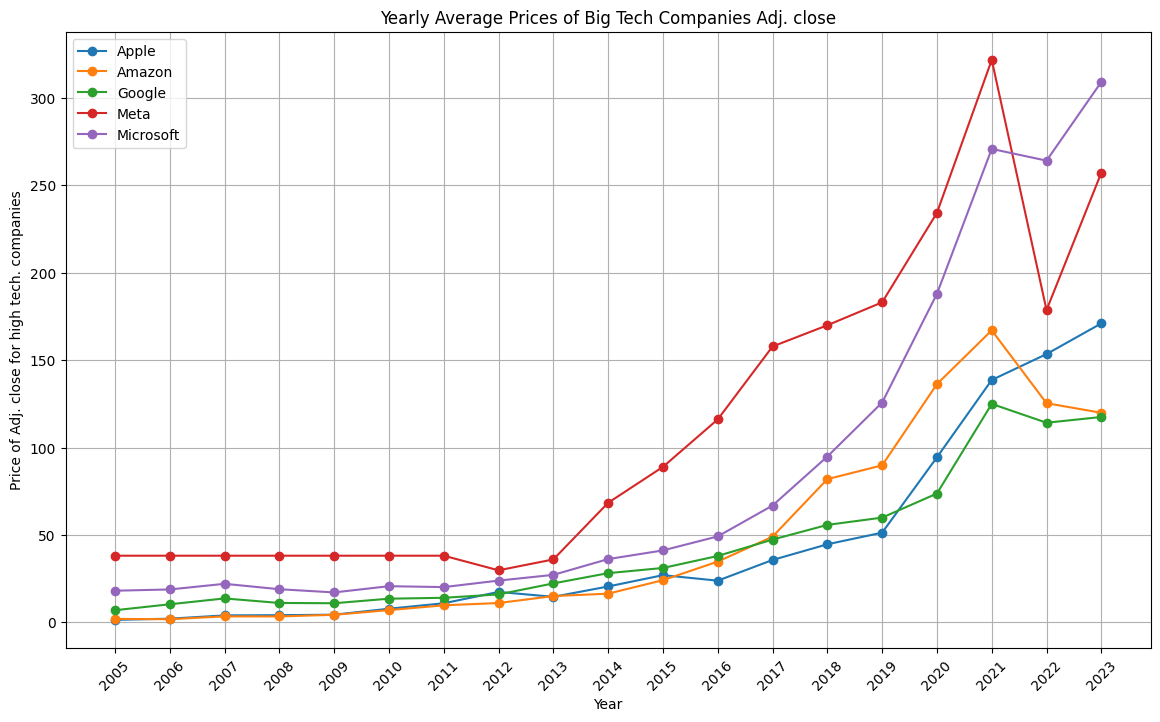

In [55]:
plt.figure(figsize=(14, 8))
plt.plot(yearly_data['year'].astype(str), yearly_data['adj_close_aapl'], label='Apple', linestyle='-', marker='o')
plt.plot(yearly_data['year'].astype(str), yearly_data['adj_close_amzn'], label='Amazon', linestyle='-', marker='o')
plt.plot(yearly_data['year'].astype(str), yearly_data['adj_close_googl'], label='Google', linestyle='-', marker='o')
plt.plot(yearly_data['year'].astype(str), yearly_data['adj_close_meta'], label='Meta', linestyle='-', marker='o')
plt.plot(yearly_data['year'].astype(str), yearly_data['adj_close_msft'], label='Microsoft', linestyle='-', marker='o')

plt.xlabel('Year')
plt.ylabel('Price of Adj. close for high tech. companies')
plt.title('Yearly Average Prices of Big Tech Companies Adj. close')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

> It is noticed that the year 2014 started an increase in stock prices for all the high tech companies. The stock prices was following a postive trend until the year 2022 it got lower especially META. This was the years of COVID, then it went up again the follwing year 2023.

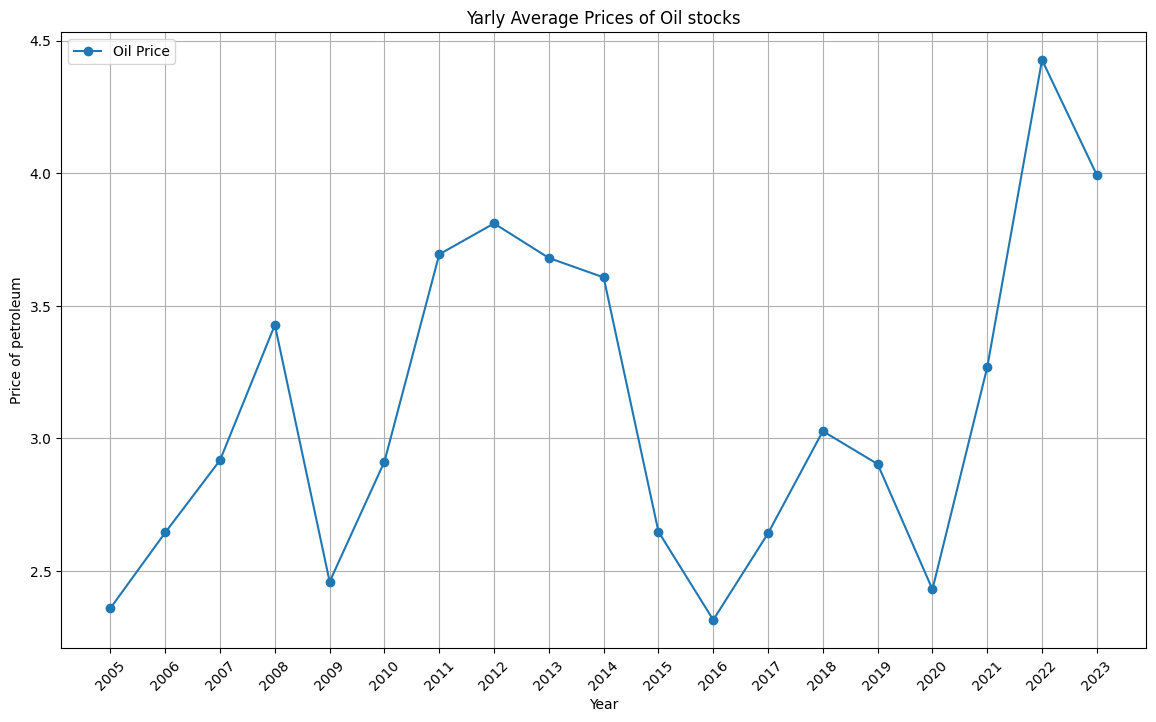

In [56]:
plt.figure(figsize=(14, 8))
plt.plot(yearly_data['year'].astype(str), yearly_data['price_oil'], label='Oil Price', linestyle='-', marker='o')

plt.xlabel('Year')
plt.ylabel('Price of petroleum')
plt.title('Yarly Average Prices of Oil stocks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

> It is noticed that in 2014 the stock prices values for the petrolium gets noticabilly low and lowe the next two years. Then it gets up again. It is very intresting that it wents up in teh years of 2020-2022 these were the times of covid.

> An intresting insight there could be a negative correlation between the petrolum prices and the high companies tech prices that is worth looking further into.

- Let's now look at the correlation:

In [57]:
columns_of_interest = [ 'price_oil',
       'adj_close_aapl', 'adj_close_amzn', 'adj_close_googl', 'adj_close_meta',
       'adj_close_msft']

correlation_matrix = yearly_data[columns_of_interest].corr()

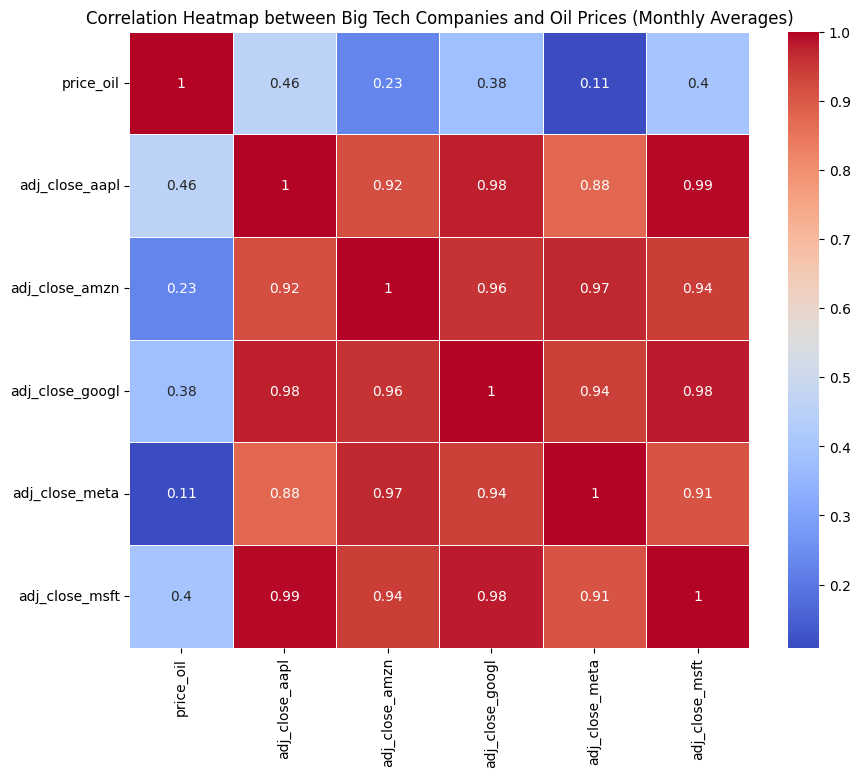

In [58]:
## Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Big Tech Companies and Oil Prices (Monthly Averages)')
plt.show()

> It is noticed that the price_oil have cold (weak) correlation with all the next columns of the adj-close. However there are no negative correlation in value they were all positive but low correlation values.

*Research answer:* 

The stocks of the big Tech. Companies such as Google and Amazon, META and Micorsoft changes or correlates negativly with the prices of oils in the same year. That is whernever the stocks goes high in each year for the high Tech. compannies, the oil prices on that year goes down. In addition of the correlation being weak between the adj_close of each of them and the price_oil values.

### **7.2:** Reflection
If the reasearcher had more time to complete the project, she would take more actions. She would have spend more time on gathering the data from resources and using new ways to do so. For the quality issues She would have looked into the ditribution of the data and studied the outliers or anomiles on the data becuase it's stocks numerical data. Other research questions that she would have furtehr explored would include COVID-19 and how have covid affected the oil prices and the big tech companies stocks.